# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9474/) and use what you've learnt to see how reliable the data is.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [16]:
orders_df = orders_cl.copy()
orderlines_df = orderlines_cl.copy()
products_df = products_cl.copy()

## 1.&nbsp; Define Pandas display format

In [3]:
# your code here

## 2.&nbsp; Exclude unwanted orders

orders –> Keep only orders with the states that you want to work with.

In [4]:
orders_cl.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [18]:
orders_completed = orders_df[orders_df["state"] == "Completed"]
orders_completed.head()

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed


orderlines –> Keep only orders present in orders.

orders –> Keep only orders present in orderlines.

In [21]:
orderlines_df = orderlines_df.rename(columns={"id_order": 'order_id'})

In [22]:
orders_in_both = orders_completed.merge(orderlines_df, on='order_id', how='inner')

In [24]:
orders_in_both.head()

,order_id,created_date,total_paid,state,id,product_id,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,0,2,PAC1561,52.99,2017-01-21 12:49:00


In [27]:
orders_end_step_2 = orders_df[orders_df.order_id.isin(orders_in_both.order_id)]

In [28]:
orderlines_end_step_2 = orderlines_df[orderlines_df.order_id.isin(orders_in_both.order_id)]

In [42]:
orders_end_step_2.order_id.nunique(), orderlines_end_step_2.order_id.nunique()

(43064, 43064)


## 3.&nbsp; Exclude orders with unknown products


Compare sku in products table with sku in orderlines (or merged table)

In [31]:
# products from orderlines that are non existing in products
unknown_products_df = orderlines_end_step_2.loc[~orderlines_end_step_2.sku.isin(products_df.sku),:]
unknown_products_df.order_id.nunique()

1363

In [32]:
unknown_products_df.head()

,id,order_id,product_id,product_quantity,sku,unit_price,date
99,1119316,299638,0,1,SYN0127,223.24,2017-01-01 11:56:18
167,1119477,299706,0,1,EVU0007,28.49,2017-01-01 13:57:16
173,1119494,299712,0,1,APP0608,279.99,2017-01-01 14:10:47
303,1119745,299860,0,1,PAC1516,457.89,2017-01-01 18:40:38
323,1119800,299881,0,1,SAN0137,49.39,2017-01-01 19:13:45


In [34]:
unknown_products_id_list = list(unknown_products_df.order_id)

In [37]:
orders_end_step_3 = orders_end_step_2[~orders_end_step_2.order_id.isin(unknown_products_id_list)]

In [38]:
orderlines_end_step_3 = orderlines_end_step_2[~orderlines_end_step_2.order_id.isin(unknown_products_id_list)]

In [41]:
orders_end_step_3.order_id.nunique(), orderlines_end_step_3.order_id.nunique()

(41701, 41701)

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [48]:
orderlines_end_step_3_copy = orderlines_end_step_3.copy()

In [49]:
orderlines_end_step_3_copy.loc[:, "unit_price_total"] = orderlines_end_step_3_copy.loc[:, "product_quantity"] * orderlines_end_step_3_copy.loc[:, "unit_price"]

In [52]:
orderlines_end_step_3_copy.head(20)

,id,order_id,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
23,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,256.49
24,1119155,299564,0,1,SAT0010,18.99,2017-01-01 02:43:37,18.99
30,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44,166.24
37,1119188,299578,0,1,LOG0191,142.49,2017-01-01 08:21:26,142.49
38,1119189,299579,0,1,LGE0031-A,127.08,2017-01-01 08:23:14,127.08


#### Step 2: 
Group by `order_id`, summarising by the sum of `unit_price_total`

In [54]:
unit_price_total_df = orderlines_end_step_3_copy.groupby("order_id").agg({"unit_price_total": 'sum'})

In [55]:
unit_price_total_df.head()

,unit_price_total
order_id,
241423,129.16
242832,10.77
243330,77.99
245275,149.00
245595,105.98


In [57]:
comparison_df = orders_end_step_3.merge(unit_price_total_df, on="order_id", how="inner")
comparison_df.head()

,order_id,created_date,total_paid,state,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98


In [58]:
comparison_df["difference"] = comparison_df["total_paid"] - comparison_df["unit_price_total"]
comparison_df.head()

,order_id,created_date,total_paid,state,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99


### What is the average difference between `total_paid` and `unit_price_total`?

In [59]:
comparison_df["difference"].mean()

4.474808277978945

### What is the distribution of these differences?

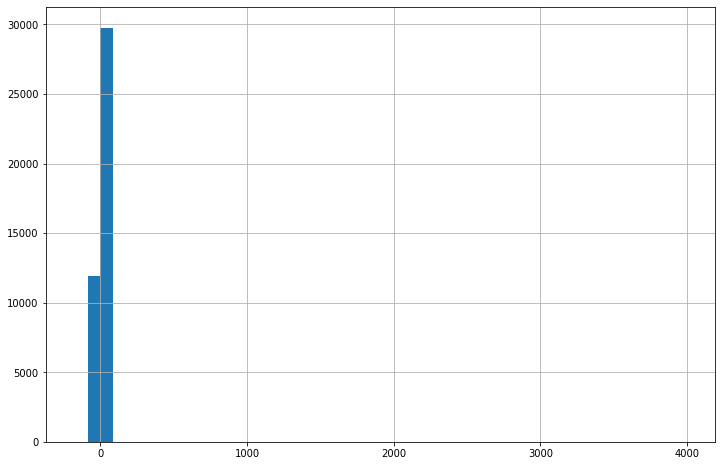

In [65]:
comparison_df["difference"].hist(bins= 50, figsize=(12,8));

In [74]:
comparison_df["difference"].round(2).value_counts().head(10)

 0.00     11043
 4.99     10959
 6.99      9921
 3.99      6792
 19.99      539
 9.99       441
 0.01       330
 7.00       261
-0.01       221
 5.00       208
Name: difference, dtype: int64

In [67]:
comparison_df["difference"].describe()

count    41701.000000
mean         4.474808
std         26.046478
min       -165.000000
25%          0.000000
50%          4.990000
75%          6.990000
max       3984.990000
Name: difference, dtype: float64

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [11]:
# your explanation here

### If there are differences that you can’t explain: what should you do with these orders?

In [12]:
# your code here

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [13]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [14]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")